<a href="https://colab.research.google.com/github/fajni/DWKD-SPOZ/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plot
%matplotlib inline

df = pd.read_csv("https://raw.githubusercontent.com/fajni/DWKD-SPOZ/main/Data/MasinskoUcenjeProfit.csv").head(500)
df['Sales'] = df['UnitPrice'] * df['OrderQuantity'] * np.where(df['Discount'] == 0, 1, df['Discount'])
df['Profit'] = df['Profit'] - df['Sales']
df

,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales
0,High,10,0.10,6,32,5,0.68,87.16,19.20
1,Not Specified,0,0.08,96,2,35,0.50,30.28,15.36
2,Critical,15,0.06,41,3,3,0.36,26.52,7.38
3,Low,5,0.00,292,4,49,0.56,-562.92,1168.00
4,Low,5,0.07,101,43,45,0.69,2343.65,304.01
...,...,...,...,...,...,...,...,...,...
495,Critical,15,0.05,4,1,5,0.08,-5.08,0.20
496,Not Specified,0,0.02,201,45,56,0.75,6365.95,180.90
497,Not Specified,0,0.02,4,24,5,0.40,29.56,1.92
498,Not Specified,0,0.04,86,19,1,0.85,1257.18,65.36


Text(0, 0.5, 'Profit')

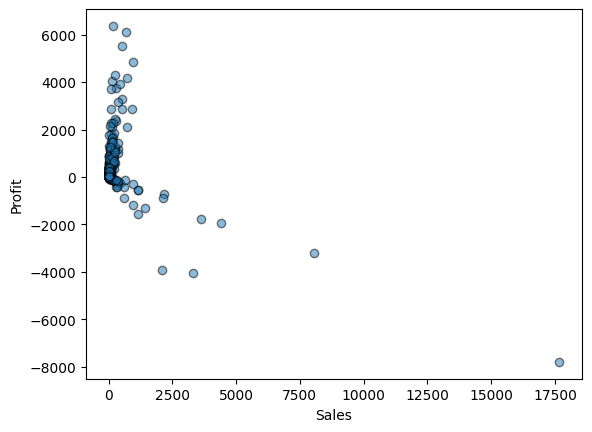

In [2]:
plot.scatter(df.Sales, df['Profit'], alpha=0.5, edgecolors='black') # isto je df.Profit ili df['Profit']
plot.xlabel('Sales')
plot.ylabel('Profit')

In [3]:
km = KMeans(n_clusters = 4)
km

KMeans(n_clusters=4)

In [4]:
y_predicted = km.fit_predict(df[['Sales', 'Profit']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
df['Cluster'] = y_predicted
df

,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Cluster
0,High,10,0.10,6,32,5,0.68,87.16,19.20,0
1,Not Specified,0,0.08,96,2,35,0.50,30.28,15.36,0
2,Critical,15,0.06,41,3,3,0.36,26.52,7.38,0
3,Low,5,0.00,292,4,49,0.56,-562.92,1168.00,0
4,Low,5,0.07,101,43,45,0.69,2343.65,304.01,2
...,...,...,...,...,...,...,...,...,...,...
495,Critical,15,0.05,4,1,5,0.08,-5.08,0.20,0
496,Not Specified,0,0.02,201,45,56,0.75,6365.95,180.90,2
497,Not Specified,0,0.02,4,24,5,0.40,29.56,1.92,0
498,Not Specified,0,0.04,86,19,1,0.85,1257.18,65.36,0


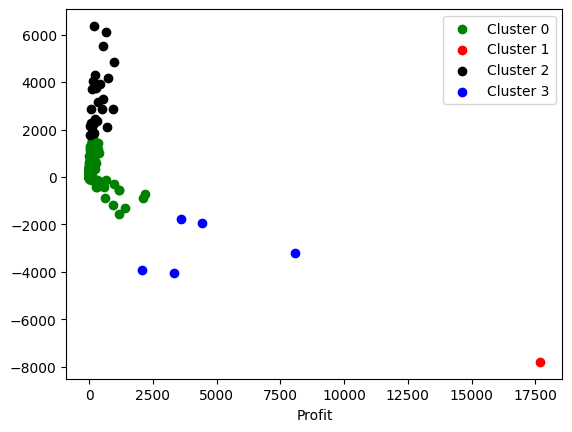

In [6]:
# Svaki cluster pripada svom data frame - u
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]
df3 = df[df.Cluster == 3]
#df4 = df[df.Cluster == 4]
#df5 = df[df.Cluster == 5]

plot.scatter(df0.Sales, df0.Profit, color='green', label = 'Cluster 0')
plot.scatter(df1.Sales, df1.Profit, color='red', label = 'Cluster 1')
plot.scatter(df2.Sales, df2.Profit, color='black', label = 'Cluster 2')
plot.scatter(df3.Sales, df3.Profit, color='blue', label = 'Cluster 3')
#plot.scatter(df4.Sales, df4.Profit, color='orange', label = 'CLuster 4')
#plot.scatter(df5.Sales, df5.Profit, color='brown', label = 'Cluster 5')

plot.xlabel('Sales')
plot.xlabel('Profit')

plot.legend()
plot.show()

In [7]:
scaler = MinMaxScaler()

# Profit u opsegu 0-1
scaler.fit(df[['Profit']])
df['Profit'] = scaler.fit_transform(df[['Profit']])

scaler.fit(df[['Sales']])
df['Sales'] = scaler.fit_transform(df[['Sales']])

df

,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Cluster
0,High,10,0.10,6,32,5,0.68,0.556587,0.001084,0
1,Not Specified,0,0.08,96,2,35,0.50,0.552570,0.000867,0
2,Critical,15,0.06,41,3,3,0.36,0.552305,0.000416,0
3,Low,5,0.00,292,4,49,0.56,0.510678,0.066062,0
4,Low,5,0.07,101,43,45,0.69,0.715942,0.017193,2
...,...,...,...,...,...,...,...,...,...,...
495,Critical,15,0.05,4,1,5,0.08,0.550073,0.000010,0
496,Not Specified,0,0.02,201,45,56,0.75,1.000000,0.010230,2
497,Not Specified,0,0.02,4,24,5,0.40,0.552520,0.000107,0
498,Not Specified,0,0.04,86,19,1,0.85,0.639215,0.003695,0


In [8]:
km = KMeans(n_clusters=4)

y_predicted = km.fit_predict(df[['Sales', 'Profit']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
df['Cluster'] = y_predicted
#df.drop('cluster', axis='columns', inplace=True)
df

,OrderPriority,OrderPriorityPrice,Discount,UnitPrice,OrderQuantity,ShippingCost,ProductBaseMargin,Profit,Sales,Cluster
0,High,10,0.10,6,32,5,0.68,0.556587,0.001084,0
1,Not Specified,0,0.08,96,2,35,0.50,0.552570,0.000867,0
2,Critical,15,0.06,41,3,3,0.36,0.552305,0.000416,0
3,Low,5,0.00,292,4,49,0.56,0.510678,0.066062,0
4,Low,5,0.07,101,43,45,0.69,0.715942,0.017193,2
...,...,...,...,...,...,...,...,...,...,...
495,Critical,15,0.05,4,1,5,0.08,0.550073,0.000010,0
496,Not Specified,0,0.02,201,45,56,0.75,1.000000,0.010230,2
497,Not Specified,0,0.02,4,24,5,0.40,0.552520,0.000107,0
498,Not Specified,0,0.04,86,19,1,0.85,0.639215,0.003695,0


In [10]:
# centroidi (x, y)
# km.cluster_centers_
for i, centroid in enumerate(km.cluster_centers_):
    print(f"Centroid {i}: {centroid}")

Centroid 0: [0.00373929 0.56105954]
Centroid 1: [1. 0.]
Centroid 2: [0.01983017 0.7846203 ]
Centroid 3: [0.24314544 0.34013707]


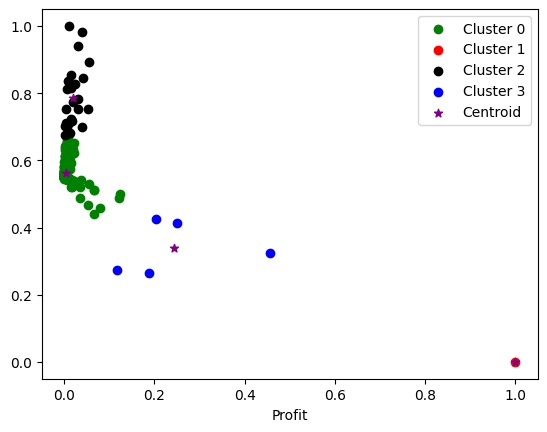

In [11]:
df0 = df[df.Cluster == 0]
df1 = df[df.Cluster == 1]
df2 = df[df.Cluster == 2]
df3 = df[df.Cluster == 3]

plot.scatter(df0.Sales, df0.Profit, color='green', label = 'Cluster 0')
plot.scatter(df1.Sales, df1.Profit, color='red', label = 'Cluster 1')
plot.scatter(df2.Sales, df2.Profit, color='black', label = 'Cluster 2')
plot.scatter(df3.Sales, df3.Profit, color='blue', label = 'Cluster 3')

plot.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], color='purple', marker='*', label='Centroid') # [:, 0] - : oznacava sve redove, 0 oznacava 0. kolonu

plot.xlabel('Sales')
plot.xlabel('Profit')
plot.legend()
plot.show()

Elbow method

In [12]:
k_range = range(1, 10)
sse = []
for k in k_range:
  km = KMeans(n_clusters = k)
  km.fit(df[['Sales', 'Profit']])
  sse.append(km.inertia_)

sse

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

[3.714144142137957,
 2.405653928327664,
 1.1895246975627483,
 0.6645116459341797,
 0.40960323401590026,
 0.32281347027068213,
 0.24359454802319772,
 0.1977402985282395,
 0.13528072642007527]

Elbow Method


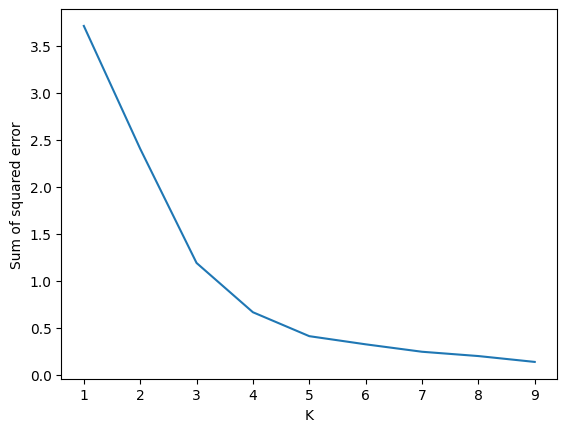

In [14]:
print('Elbow Method')
plot.xlabel('K')
plot.ylabel('Sum of squared error')
plot.plot(k_range, sse)